In [110]:
import pandas as pd
import plotly as px

In [75]:
dados = pd.read_csv('./dados/lancamentos-comerciais-por-distribuidoras.csv', sep=';')

In [7]:
# Tamanho do Dataframe
print(f'Temos {len(dados)} linhas.')

Temos 6157 linhas


In [10]:
# Primeira visualização
# Na descrição do portal de dados abertos há apenas o nome das colunas:
# Data de lançamento da obra; Título original; CPB/ROE; Tipo da obra; \
# País da obra; Público total; Renda total; Razão social Distribuidora; \
# Registro Distribuidora; CNPJ Distribuidora.

# Vamos verificar:

dados.columns

Index(['DATA_LANCAMENTO_OBRA', 'TITULO_ORIGINAL', 'CPB_ROE', 'TIPO_OBRA',
       'PAIS_OBRA', 'PUBLICO_TOTAL', 'RENDA_TOTAL',
       'RAZAO_SOCIAL_DISTRIBUIDORA', 'REGISTRO_DISTRIBUIDORA',
       'CNPJ_DISTRIBUIDORA'],
      dtype='object')

In [76]:
# Vamos verificar os dados melhor:

dados.head(5)

,DATA_LANCAMENTO_OBRA,TITULO_ORIGINAL,CPB_ROE,TIPO_OBRA,PAIS_OBRA,PUBLICO_TOTAL,RENDA_TOTAL,RAZAO_SOCIAL_DISTRIBUIDORA,REGISTRO_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA
0,08/08/2024,MAIS PESADO É O CÉU,B2300060700000,FICÇÃO,BRASIL,364,"R$ 3.493,00",SEREIA DISTRIBUIÇÃO DE FILMES LTDA,13753.0,08.905.114/0001-92
1,31/07/2024,BLACKPINK WORLD TOUR [BORN PINK] IN CINEMAS,E2400243000000,VÍDEOMUSICAL,CORÉIA DO SUL,18279,"R$ 618.816,43",UNITED CINEMAS INTERNATIONAL BRASIL LTDA.,749.0,01.289.530/0001-64
2,31/07/2024,ESTRANHO CAMINHO,B2300296700000,FICÇÃO,BRASIL,23,"R$ 353,79",EMBAUBA FILMES LTDA,23638.0,15.144.532/0001-70
3,25/07/2024,AKU WA SONZAI SHINAI,E2400245700000,FICÇÃO,JAPÃO,5025,"R$ 95.047,76",TAG CULTURAL DISTRIBUIDORA DE FILMES LTDA,173.0,03.599.148/0001-82
4,25/07/2024,DEADPOOL & WOLVERINE,E2400232500000,FICÇÃO,ESTADOS UNIDOS,3386450,"R$ 71.928.236,32",THE WALT DISNEY COMPANY (BRASIL) LTDA.,18398.0,73.042.962/0001-87


In [50]:
# Vamos fazer alguns filtros:

# Qual é a renda total máxima?
dados.RENDA_TOTAL.max()

'R$ 999,62'

In [52]:
dados.info()
# RENDA_TOTAL é do tipo object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATA_LANCAMENTO_OBRA        6157 non-null   object 
 1   TITULO_ORIGINAL             6157 non-null   object 
 2   CPB_ROE                     6157 non-null   object 
 3   TIPO_OBRA                   6157 non-null   object 
 4   PAIS_OBRA                   6156 non-null   object 
 5   PUBLICO_TOTAL               6157 non-null   int64  
 6   RENDA_TOTAL                 6157 non-null   object 
 7   RAZAO_SOCIAL_DISTRIBUIDORA  6157 non-null   object 
 8   REGISTRO_DISTRIBUIDORA      6156 non-null   float64
 9   CNPJ_DISTRIBUIDORA          6157 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 481.1+ KB


In [54]:
# Vamos tentar mudar o tipo com o método astype, que Transmitir um objeto pandas para um dtype especificado
dados['RENDA_TOTAL'].astype('float64')
# Não foi possível converter as strings em float, por conta de do separador decimal.

ValueError: could not convert string to float: 'R$ 3.493,00'

In [62]:
float('R$ 3.493,00')
'''
Temos dois problemas, a string possui valores não-numéricos, separador decimal \
não é reconhecido pelo tipo float e ainda possui um separador de classe decimais.
'''

ValueError: could not convert string to float: 'R$ 3.493,00'

In [71]:
float('R$ 3.493,00'[3:].replace('.','').replace(',','.'))

3493.0

In [66]:
float('3.493')

3.493

In [77]:
def converte_string(valor):
    return valor[3:].replace('.','').replace(',','.')

In [78]:
dados['RENDA_TOTAL'] = dados['RENDA_TOTAL'].apply(converte_string)
dados['RENDA_TOTAL']

0           3493.00
1         618816.43
2            353.79
3          95047.76
4       71928236.32
           ...     
6152     2350017.91
6153       37557.00
6154    50545885.00
6155     9590392.25
6156      141070.93
Name: RENDA_TOTAL, Length: 6157, dtype: object

In [87]:
dados['RENDA_TOTAL'] = dados['RENDA_TOTAL'].astype('float64')

In [88]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATA_LANCAMENTO_OBRA        6157 non-null   object 
 1   TITULO_ORIGINAL             6157 non-null   object 
 2   CPB_ROE                     6157 non-null   object 
 3   TIPO_OBRA                   6157 non-null   object 
 4   PAIS_OBRA                   6156 non-null   object 
 5   PUBLICO_TOTAL               6157 non-null   int64  
 6   RENDA_TOTAL                 6157 non-null   float64
 7   RAZAO_SOCIAL_DISTRIBUIDORA  6157 non-null   object 
 8   REGISTRO_DISTRIBUIDORA      6156 non-null   float64
 9   CNPJ_DISTRIBUIDORA          6157 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 481.1+ KB


In [89]:
dados.RENDA_TOTAL.max()

np.float64(425729796.94)

In [94]:
filme_mais_caro = dados.loc[dados['RENDA_TOTAL'] == 425729796.94]
filme_mais_caro

,DATA_LANCAMENTO_OBRA,TITULO_ORIGINAL,CPB_ROE,TIPO_OBRA,PAIS_OBRA,PUBLICO_TOTAL,RENDA_TOTAL,RAZAO_SOCIAL_DISTRIBUIDORA,REGISTRO_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA
39,20/06/2024,INSIDE OUT 2,E2400179900000,ANIMAÇÃO,ESTADOS UNIDOS,21473303,4.257298e+08,THE WALT DISNEY COMPANY (BRASIL) LTDA.,18398.0,73.042.962/0001-87


In [95]:
dados[dados.PAIS_OBRA == 'BRASIL'].head(2)

,DATA_LANCAMENTO_OBRA,TITULO_ORIGINAL,CPB_ROE,TIPO_OBRA,PAIS_OBRA,PUBLICO_TOTAL,RENDA_TOTAL,RAZAO_SOCIAL_DISTRIBUIDORA,REGISTRO_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA
0,08/08/2024,MAIS PESADO É O CÉU,B2300060700000,FICÇÃO,BRASIL,364,3493.00,SEREIA DISTRIBUIÇÃO DE FILMES LTDA,13753.0,08.905.114/0001-92
2,31/07/2024,ESTRANHO CAMINHO,B2300296700000,FICÇÃO,BRASIL,23,353.79,EMBAUBA FILMES LTDA,23638.0,15.144.532/0001-70


In [101]:
dados[dados.PAIS_OBRA == 'BRASIL'].RENDA_TOTAL.max()

np.float64(169382611.11)

In [103]:
filme_mais_caro_brasil = dados[dados.PAIS_OBRA == 'BRASIL'].loc[dados['RENDA_TOTAL'] == 169382611.11]
filme_mais_caro_brasil

,DATA_LANCAMENTO_OBRA,TITULO_ORIGINAL,CPB_ROE,TIPO_OBRA,PAIS_OBRA,PUBLICO_TOTAL,RENDA_TOTAL,RAZAO_SOCIAL_DISTRIBUIDORA,REGISTRO_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA
1642,26/12/2019,MINHA MÃE É UMA PEÇA 3,B1900576900000,FICÇÃO,BRASIL,10936882,1.693826e+08,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,4904.0,07.616.202/0001-01


In [117]:
dados.sort_values('RENDA_TOTAL', ascending=False)

,DATA_LANCAMENTO_OBRA,TITULO_ORIGINAL,CPB_ROE,TIPO_OBRA,PAIS_OBRA,PUBLICO_TOTAL,RENDA_TOTAL,RAZAO_SOCIAL_DISTRIBUIDORA,REGISTRO_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA
39,20/06/2024,INSIDE OUT 2,E2400179900000,ANIMAÇÃO,ESTADOS UNIDOS,21473303,4.257298e+08,THE WALT DISNEY COMPANY (BRASIL) LTDA.,18398.0,73.042.962/0001-87
1944,25/04/2019,AVENGERS: ENDGAME,E1900107800000,FICÇÃO,ESTADOS UNIDOS,19656475,3.386250e+08,THE WALT DISNEY COMPANY (BRASIL) LTDA.,18398.0,73.042.962/0001-87
1149,16/12/2021,SPIDER-MAN: NO WAY HOME,E2100453300000,FICÇÃO,ESTADOS UNIDOS,17382043,3.174329e+08,COLUMBIA TRISTAR FILMES DO BRASIL LTDA,84.0,00.979.601/0001-98
1854,18/07/2019,THE LION KING,E1900267700000,FICÇÃO,ESTADOS UNIDOS,16249412,2.659039e+08,THE WALT DISNEY COMPANY (BRASIL) LTDA.,18398.0,73.042.962/0001-87
759,15/12/2022,AVATAR: THE WAY OF WATER,E2200431200000,FICÇÃO,ESTADOS UNIDOS,11708276,2.413956e+08,THE WALT DISNEY COMPANY (BRASIL) LTDA.,18398.0,73.042.962/0001-87
...,...,...,...,...,...,...,...,...,...,...
2540,01/02/2018,THE SHAPE OF WATER,E1700442300000,FICÇÃO,ESTADOS UNIDOS,13,2.600000e+01,THE WALT DISNEY COMPANY (BRASIL) LTDA.,18398.0,73.042.962/0001-87
345,15/11/2023,THE HUNGER GAMES – BALLAD OF SONGBIRDS AND SNAKES,E2300444800000,FICÇÃO,ESTADOS UNIDOS,1,2.000000e+01,CINE CAXAMBU LTDA,53644.0,50.552.809/0001-02
1520,08/10/2020,ZONA ÁRIDA,B2000259000000,DOCUMENTÁRIO,BRASIL,1,1.200000e+01,OLHAR DISTRIBUICAO DE FILMES LTDA,37242.0,28.083.221/0001-90
145,11/04/2024,AS LINHAS DA MINHA MÃO,B2300145400000,DOCUMENTÁRIO,BRASIL,1,1.000000e+01,KOMPANHIA TEATRO MULTIMÍDIA DE SÃO PAULO,57643.0,60.740.149/0001-39


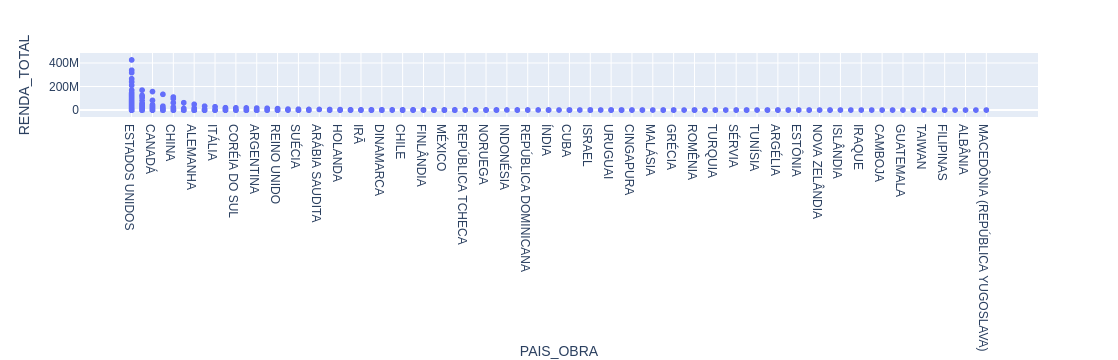

In [220]:
dados.sort_values('RENDA_TOTAL', ascending=False).plot(x='PAIS_OBRA', y='RENDA_TOTAL', kind='scatter')

In [129]:
quant_filmes_brasil = len(dados[dados.PAIS_OBRA == 'BRASIL'])
quant_filmes_coreanos = len(dados[dados.PAIS_OBRA == 'CORÉIA DO SUL'])
print(quant_filmes_brasil,quant_filmes_coreanos)

1922 44


In [161]:
quant_renda = dados[['PAIS_OBRA', 'TITULO_ORIGINAL']].groupby('PAIS_OBRA').count().sort_values('PAIS_OBRA', ascending=False).reset_index()

In [163]:
quant_renda.PAIS_OBRA.unique()

array(['ÍNDIA', 'ÁUSTRIA', 'ÁFRICA DO SUL', 'VENEZUELA', 'URUGUAI',
       'UCRÂNIA', 'TURQUIA', 'TUNÍSIA', 'TERRITÓRIOS PALESTINOS OCUPADOS',
       'TAIWAN', 'SÉRVIA', 'SUÍÇA', 'SUÉCIA', 'RÚSSIA', 'ROMÊNIA',
       'REPÚBLICA TCHECA', 'REPÚBLICA DOMINICANA', 'REINO UNIDO',
       'PORTUGAL', 'POLÔNIA', 'PERU', 'PARAGUAI', 'PANAMÁ',
       'NOVA ZELÂNDIA', 'NORUEGA', 'MÔNACO', 'MÉXICO', 'MALÁSIA',
       'MACEDÔNIA (REPÚBLICA YUGOSLAVA)', 'LÍBANO', 'LUXEMBURGO', 'JAPÃO',
       'IÊMEN', 'ITÁLIA', 'ISRAEL', 'ISLÂNDIA', 'IRÃ', 'IRLANDA',
       'IRAQUE', 'INGLATERRA', 'INDONÉSIA', 'HUNGRIA', 'HONG KONG',
       'HOLANDA', 'GUATEMALA', 'GRÉCIA', 'FRANÇA', 'FINLÂNDIA',
       'FILIPINAS', 'ESTÔNIA', 'ESTADOS UNIDOS', 'ESPANHA', 'ESLOVÊNIA',
       'ESLOVÁQUIA', 'EMIRADOS ÁRABES UNIDOS', 'EGITO', 'DINAMARCA',
       'CUBA', 'CROÁCIA (HRVATSKA)', 'COSTA RICA', 'CORÉIA DO SUL',
       'CORÉIA DO NORTE', 'CONGO', 'COLÔMBIA', 'CINGAPURA', 'CHINA',
       'CHILE', 'CHADE', 'CANADÁ', 'CAMBOJA', 

In [194]:
rendas = []
for pais in quant_renda.PAIS_OBRA.unique():
    renda = dados[dados.PAIS_OBRA == pais].RENDA_TOTAL.mean()
    rendas.append(renda)
    
quant_renda['RENDA_MÉDIA'] = rendas
quant_renda

,PAIS_OBRA,TITULO_ORIGINAL,RENDA_MÉDIA,RENDA_MÉDIA_POR_FILME
0,ÍNDIA,4,2.470077e+05,0 61751.91875 dtype: float64
1,ÁUSTRIA,12,2.399169e+05,1 19993.070972 dtype: float64
2,ÁFRICA DO SUL,8,1.038687e+06,2 129835.8625 dtype: float64
3,VENEZUELA,4,5.003331e+04,3 12508.3275 dtype: float64
4,URUGUAI,8,9.348234e+04,4 11685.292031 dtype: float64
...,...,...,...,...
78,ARGÉLIA,4,4.199222e+04,78 10498.054375 dtype: float64
79,ARGENTINA,123,5.015840e+05,79 4077.918314 dtype: float64
80,ALEMANHA,250,7.595710e+05,80 3038.283846 dtype: float64
81,ALBÂNIA,1,3.922000e+03,81 3922.0 dtype: float64


In [210]:
print(quant_renda[quant_renda.PAIS_OBRA == 'BRASIL'].RENDA_MÉDIA.min())

1671120.7638761706


In [212]:
rendas_filme = []
for pais in quant_renda.PAIS_OBRA.unique():
    renda_filme = quant_renda[quant_renda.PAIS_OBRA == pais].RENDA_MÉDIA.min() / quant_renda[quant_renda.PAIS_OBRA == pais].TITULO_ORIGINAL.min()
    rendas_filme.append(renda_filme)
quant_renda['RENDA_MÉDIA_POR_FILME'] = rendas_filme
quant_renda

,PAIS_OBRA,TITULO_ORIGINAL,RENDA_MÉDIA,RENDA_MÉDIA_POR_FILME
0,ÍNDIA,4,2.470077e+05,61751.918750
1,ÁUSTRIA,12,2.399169e+05,19993.070972
2,ÁFRICA DO SUL,8,1.038687e+06,129835.862500
3,VENEZUELA,4,5.003331e+04,12508.327500
4,URUGUAI,8,9.348234e+04,11685.292031
...,...,...,...,...
78,ARGÉLIA,4,4.199222e+04,10498.054375
79,ARGENTINA,123,5.015840e+05,4077.918314
80,ALEMANHA,250,7.595710e+05,3038.283846
81,ALBÂNIA,1,3.922000e+03,3922.000000


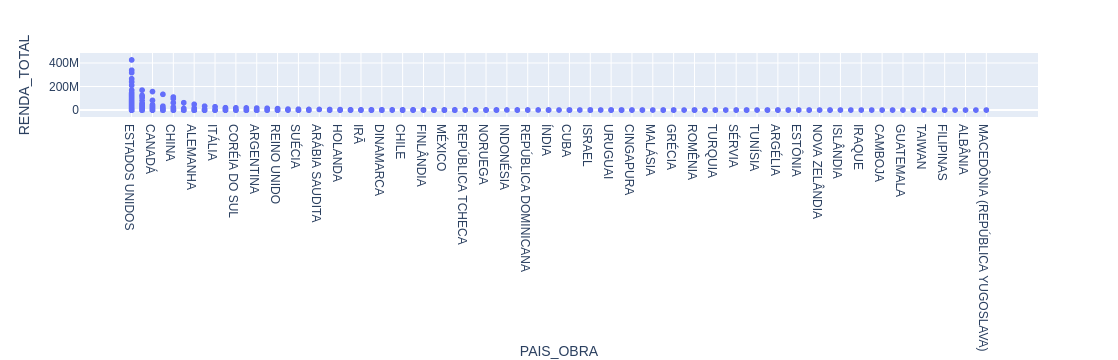

In [221]:
dados.sort_values('RENDA_TOTAL', ascending=False).plot(x='PAIS_OBRA', y='RENDA_TOTAL', kind='scatter')

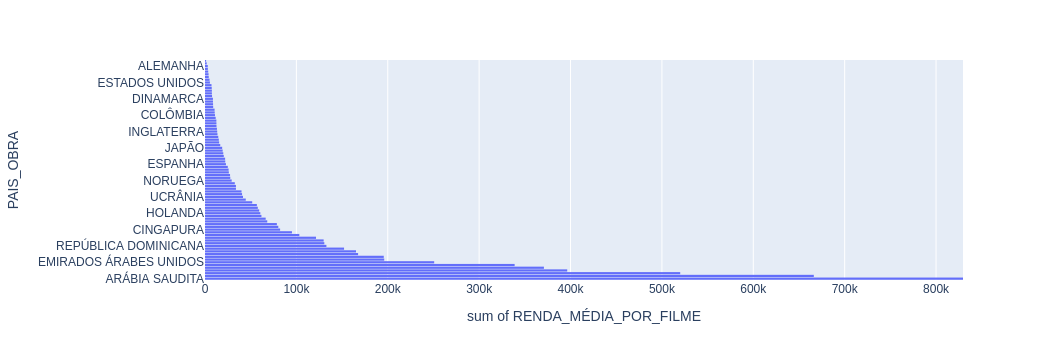

In [224]:
quant_renda.sort_values('RENDA_MÉDIA_POR_FILME', ascending=False).plot(x='RENDA_MÉDIA_POR_FILME', y='PAIS_OBRA', kind='hist')

In [41]:
import zipfile
# Visualizando o que há dentro do arquivvo do tipo zip:
with zipfile.ZipFile('./dados/obras-nao-pub-brasileiras-csv.zip') as arq_zip:
    print(arq_zip.namelist())

['obras-nao-pub-brasileiras-2002.csv', 'obras-nao-pub-brasileiras-2003.csv', 'obras-nao-pub-brasileiras-2004.csv', 'obras-nao-pub-brasileiras-2005.csv', 'obras-nao-pub-brasileiras-2006.csv', 'obras-nao-pub-brasileiras-2007.csv', 'obras-nao-pub-brasileiras-2008.csv', 'obras-nao-pub-brasileiras-2009.csv', 'obras-nao-pub-brasileiras-2010.csv', 'obras-nao-pub-brasileiras-2011.csv', 'obras-nao-pub-brasileiras-2012.csv', 'obras-nao-pub-brasileiras-2013.csv', 'obras-nao-pub-brasileiras-2014.csv', 'obras-nao-pub-brasileiras-2015.csv', 'obras-nao-pub-brasileiras-2016.csv', 'obras-nao-pub-brasileiras-2017.csv', 'obras-nao-pub-brasileiras-2018.csv', 'obras-nao-pub-brasileiras-2019.csv', 'obras-nao-pub-brasileiras-2020.csv', 'obras-nao-pub-brasileiras-2021.csv', 'obras-nao-pub-brasileiras-2022.csv', 'obras-nao-pub-brasileiras-2023.csv', 'obras-nao-pub-brasileiras-2024.csv']


In [40]:
with zipfile.ZipFile('./dados/obras-nao-pub-brasileiras-csv.zip') as arq_zip:
    with arq_zip.open('obras-nao-pub-brasileiras-2024.csv') as arq_csv:
        obras_nao_pub_brasileiras_2024 = pd.read_csv(arq_csv, sep=';')

In [42]:
obras_nao_pub_brasileiras_2024

,TITULO_ORIGINAL,CPB,DATA_EMISSAO_CPB,SITUACAO_OBRA,TIPO_OBRA,SUBTIPO_OBRA,CLASSIFICACAO_OBRA,ORGANIZACAO_TEMPORAL,DURACAO_TOTAL_MINUTOS,QUANTIDADE_EPISODIOS,ANO_PRODUCAO_INICIAL,ANO_PRODUCAO_FINAL,SEGMENTO_DESTINACAO_INICIAL,COPRODUCAO_INTERNACIONAL,REQUERENTE,CNPJ_REQUERENTE,UF_REQUERENTE,MUNICIPIO_REQUERENTE
0,"""DESCOSTURANDO COM HERCHCOVITCH"" TEMPORADA 2",B2400134000000,04/04/2024,DEFERIDO,REALITY-SHOW,NaN,BRASILEIRA INDEPENDENTE CONSTITUINTE DE ESPAÇO...,SERIADA EM MÚLTIPLAS TEMPORADAS,460,10.0,2024.0,2024.0,COMUNICAÇÃO ELETRÔNICA DE MASSA POR ASSINATURA...,NÃO,MOOD HUNTER PRODUÇÕES LTDA,06.177.126/0001-12,SP,SÃO PAULO
1,(IN)CONFIDENCIAS,B2400151600000,15/04/2024,DEFERIDO,VARIEDADES,NaN,BRASILEIRA CONSTITUINTE DE ESPAÇO QUALIFICADO,SERIADA EM MÚLTIPLAS TEMPORADAS,104,8.0,2023.0,2023.0,RADIODIFUSÃO DE SONS E IMAGENS (TV ABERTA),NÃO,UNIVERSIDADE FEDERAL DE OURO PRETO,23.070.659/0001-10,MG,OURO PRETO
2,(IN)VISÍVEL,B2400325900000,19/08/2024,DEFERIDO,DOCUMENTÁRIO,NaN,BRASILEIRA INDEPENDENTE CONSTITUINTE DE ESPAÇO...,NÃO SERIADA,"76,6",NaN,2024.0,NaN,COMUNICAÇÃO ELETRÔNICA DE MASSA POR ASSINATURA...,NÃO,OLÉ PRODUÇÕES LTDA,09.019.897/0001-70,SP,SÃO PAULO
3,/CHAT,B2400308300000,31/07/2024,DEFERIDO,VARIEDADES,NaN,BRASILEIRA CONSTITUINTE DE ESPAÇO QUALIFICADO,SERIADA DE DURAÇÃO INDETERMINADA,1500,50.0,2024.0,2024.0,COMUNICAÇÃO ELETRÔNICA DE MASSA POR ASSINATURA...,NÃO,PLAYTV TELEVISÃO LTDA,07.121.705/0001-06,SP,SÃO PAULO
4,02 DE JULHO: A RETOMADA,B2400226700000,04/06/2024,DEFERIDO,DOCUMENTÁRIO,NaN,BRASILEIRA CONSTITUINTE DE ESPAÇO QUALIFICADO,NÃO SERIADA,46,NaN,2024.0,NaN,RADIODIFUSÃO DE SONS E IMAGENS (TV ABERTA),NÃO,JOANA ARANHA MONCAU,PESSOA FÍSICA,SP,SÃO PAULO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,É POR VOCÊ QUE CANTO,B2400285500000,18/07/2024,DEFERIDO,VÍDEOMUSICAL,Registro de Eventos,BRASILEIRA INDEPENDENTE CONSTITUINTE DE ESPAÇO...,NÃO SERIADA,"3,9",NaN,2023.0,NaN,RADIODIFUSÃO DE SONS E IMAGENS (TV ABERTA),NÃO,NAVEGADOR MÚSICA PRODUÇÃO E EVENTOS LTDA,02.899.488/0001-66,MG,BELO HORIZONTE
2374,É TUDO NOSSO,B2400041300000,29/01/2024,DEFERIDO,VARIEDADES,NaN,BRASILEIRA CONSTITUINTE DE ESPAÇO QUALIFICADO,SERIADA EM TEMPORADA ÚNICA,3520,44.0,2024.0,2024.0,RADIODIFUSÃO DE SONS E IMAGENS (TV ABERTA),NÃO,TVSBT CANAL 4 DE SAO PAULO S/A,45.039.237/0001-14,SP,OSASCO
2375,É UMA PENA,B2400184600000,06/05/2024,DEFERIDO,VÍDEOMUSICAL,Registro de Eventos,BRASILEIRA INDEPENDENTE CONSTITUINTE DE ESPAÇO...,NÃO SERIADA,"2,0",NaN,2024.0,NaN,COMUNICAÇÃO ELETRÔNICA DE MASSA POR ASSINATURA...,NÃO,47.707.461 BARBARA DA SILVA FIGUEIREDO,47.707.461/0001-62,SP,SÃO PAULO
2376,ÌNTERIM,B2400042500000,29/01/2024,DEFERIDO,DOCUMENTÁRIO,NaN,BRASILEIRA INDEPENDENTE CONSTITUINTE DE ESPAÇO...,NÃO SERIADA,"14,0",NaN,2024.0,NaN,OUTROS MERCADOS,NÃO,CAULI FERNANDES OLIVEIRA,PESSOA FÍSICA,SP,SANTOS
